In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
import sklearn
import sklearn.preprocessing
import sklearn.metrics

In [37]:
url = 'https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/international-airline-passengers.csv'
data = pd.read_csv(url, sep=';')

In [38]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


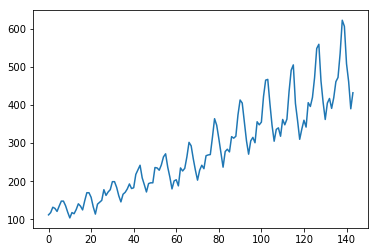

In [46]:
plt.plot(data.Passengers)

In [40]:
np.random.seed(7)

In [41]:
ts = data.iloc[:, 1].astype('float').values.reshape(-1, 1)

In [42]:
ts.shape

(144, 1)

In [43]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1))
ts = scaler.fit_transform(ts)

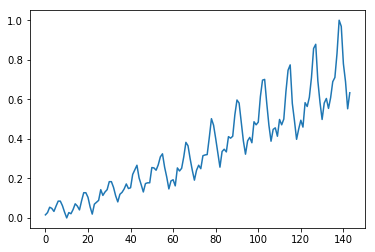

In [47]:
plt.plot(ts)

In [52]:
train_size = int(len(ts) * 0.67)

In [53]:
ts_train = ts[:train_size]
ts_test = ts[train_size:]

In [54]:
ts_train.shape

(96, 1)

In [55]:
ts_test.shape

(48, 1)

In [56]:
look_back=1
def make_xy(ts):
    Y = ts[look_back:]
    X = ts[:-look_back]
    return X, Y

In [83]:
X_train, Y_train = make_xy(ts_train)
X_test, Y_test = make_xy(ts_test)

In [84]:
X_train = X_train.reshape(X_train.shape[0], 1, 1)
X_test = X_test.reshape(X_test.shape[0], 1, 1)

In [85]:
X_train.shape

(95, 1, 1)

In [86]:
Y_train.shape

(95, 1)

In [61]:
model = keras.models.Sequential([
    keras.layers.LSTM(4, input_shape=(1, look_back)),
    keras.layers.Dense(1)
])

In [62]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_squared_error)

In [63]:
model.fit(X_train, Y_train, epochs=100, batch_size=1, validation_data=[X_test, Y_test])

Train on 95 samples, validate on 47 samples
Epoch 1/100
95/95 [==============================] - 2s 19ms/step - loss: 0.0406 - val_loss: 0.2212
Epoch 2/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.1526
Epoch 3/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0147 - val_loss: 0.1246
Epoch 4/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.1090
Epoch 5/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.0966
Epoch 6/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.0835
Epoch 7/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0753
Epoch 8/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0690
Epoch 9/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0564
Epoch 10/100
95/95 [==============================] - 0s 3ms/ste

In [64]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [65]:
pred_train_original_scale = scaler.inverse_transform(pred_train)
pred_test_original_scale = scaler.inverse_transform(pred_test)

In [66]:
Y_train_original_scale = scaler.inverse_transform(Y_train)
Y_test_original_scale = scaler.inverse_transform(Y_test)

In [71]:
train_rmse = np.sqrt(sklearn.metrics.mean_squared_error(Y_train_original_scale, pred_train_original_scale))
train_rmse

22.927175101435921

In [72]:
test_rmse = np.sqrt(sklearn.metrics.mean_squared_error(Y_test_original_scale, pred_test_original_scale))
test_rmse

48.279758992641824

In [73]:
pred_test.shape

(47, 1)

In [74]:
pred_train.shape

(95, 1)

In [75]:
ts.shape

(144, 1)

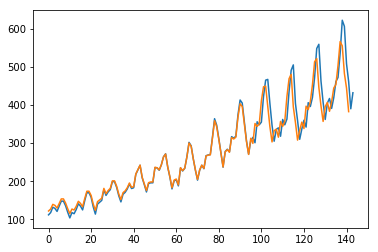

In [80]:
plt.plot(data.Passengers)

plt.plot(np.vstack([pred_train_original_scale, pred_test_original_scale]))

http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/